<a href="https://colab.research.google.com/github/jinzus/tennis/blob/main/TENNIS_PRIMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

SIMULAZIONE 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



SIMULAZIONE 2



SIMULAZIONE 3



SIMULAZIONE 4



SIMULAZIONE 5



SIMULAZIONE 6



SIMULAZIONE 7



SIMULAZIONE 8



SIMULAZIONE 9


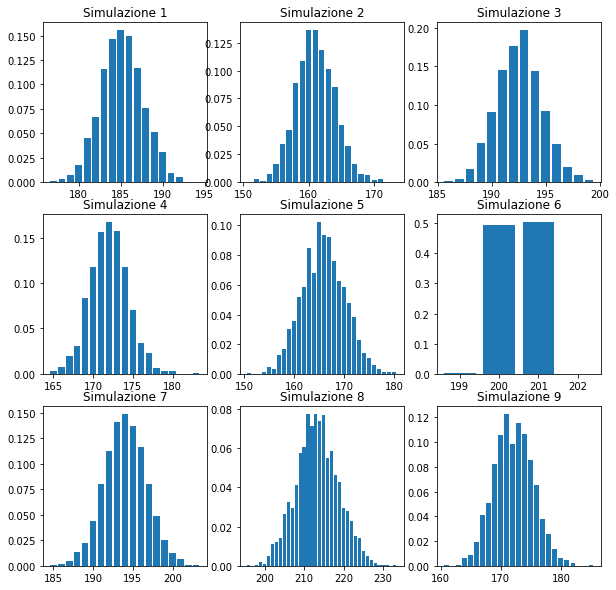

In [2]:
plt.figure(figsize=(10,10))
tutte_le_simulazioni=[]
medie=(13,15,12.5,14,15,12,12.4,11.2,14)
sds=(2.4,3.5,1.9,2.6,5.4,.3,2.4,4.3,3.5)
for una,(media,sd) in enumerate(zip(medie,sds)): 
  print("SIMULAZIONE {:d}".format(una+1))
  temporaneo=[]
  n_simulazioni=2000
  for item in tqdm_notebook(range(n_simulazioni)):
    items=[0]
    while np.sum(items)<=2400:
      gauss=np.random.normal(media,sd)
      if gauss<1 or gauss>24:
        continue
      items.append(gauss)

    somma=0
    for index in range(len(items)):
      if somma>2400:
        break
      somma+=items[index]

    items=items[1:index]
    items.append(2400-np.sum(items))
    items=np.random.permutation(items)
    temporaneo.append(items)

  simulazioni={"Simulazione {:d}".format(key):values for key,values in enumerate(temporaneo)}
  lunghezze=np.array([len(i) for i in simulazioni.values()])

  np.set_printoptions(suppress=True)
  indici=np.unique(lunghezze)
  tabella=np.empty((len(indici),2))
  for i,item in enumerate(indici):
    riga=len(lunghezze[lunghezze==item])
    tabella[i]=np.array([item,riga])
    
  probabilità=tabella[:,-1]/n_simulazioni
  tabella_probabilità=(np.c_[indici,probabilità])
  plt.subplot(331+una)
  plt.bar(tabella_probabilità[:,0],tabella_probabilità[:,1])
  plt.title("Simulazione {:d}".format(una+1))
  tutte_le_simulazioni.append(simulazioni)